In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

D:\anaconda_cs210\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('AB.csv', na_values='?')
df.dropna(inplace=True)
df2 = pd.read_csv('AB.csv', na_values='?')
df2.dropna(inplace=True)

In [3]:
def change_status(Satus):
    if Satus == 'Operating':
        return 1;
    else :
        return 0;

In [4]:
def change_category(Categories):
    if Categories == 'Technology':
        return 0;
    elif Categories == 'Service_Ind':
        return 1;
    elif Categories == 'E-Commerce':
        return 2;
    elif Categories == 'Curated_Web':
        return 3;
    elif Categories == 'Advertising':
        return 4;
    elif Categories == 'Education':
        return 5;
    elif Categories == 'Finance':
        return 6;
    elif Categories == 'Fashion':
        return 7;
    elif Categories == 'Medical':
        return 8;

In [5]:
def change_funding(Amounts_raised_in_different_funding_rounds):
    if Amounts_raised_in_different_funding_rounds < 1:
        return 'zero'
    elif Amounts_raised_in_different_funding_rounds >1 :
        return Amounts_raised_in_different_funding_rounds;
#    elif Amounts_raised_in_different_funding_rounds < 100000 :
#        return 'Extremely_Low'
#    elif Amounts_raised_in_different_funding_rounds < 500000 :
#        return 'Low'
#    elif Amounts_raised_in_different_funding_rounds < 1000000 :
#        return 'medium'
#    elif Amounts_raised_in_different_funding_rounds < 5000000 :
 #       return 'High'
#    else:
#        return 'Extremely_High'

In [6]:
df['Satus'] = df['Satus'].apply(change_status)
df2['Satus'] = df2['Satus'].apply(change_status)
df2['Amounts_raised_in_different_funding_rounds'] = df2['Amounts_raised_in_different_funding_rounds'].apply(change_funding)
#df['YCombinatorYear'] = df['YCombinatorYear'].apply(change_year)
#df['Categories'] = df['Categories'].apply(change_category)
df3 = df[df2.Amounts_raised_in_different_funding_rounds != 'zero' ]
df2.drop(['Company'], axis=1, inplace=True)
df3.drop(['Company', 'HeadquartersCity'], axis=1, inplace=True)
df3

D:\anaconda_cs210\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
0,1,1200000,E-Commerce,2011
1,1,3000000,E-Commerce,2013
2,1,7300000,Service_Ind,2012
3,0,2000000,Technology,2010
4,1,1714000,Finance,2010
6,1,2400000,Service_Ind,2013
7,1,3800000,Service_Ind,2012
8,0,1300000,Curated_Web,2010
9,0,740000,Curated_Web,2010
10,1,535000,Finance,2013


In [7]:
# Preview
df3.head()

,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
0,1,1200000,E-Commerce,2011
1,1,3000000,E-Commerce,2013
2,1,7300000,Service_Ind,2012
3,0,2000000,Technology,2010
4,1,1714000,Finance,2010


In [8]:
# DataFrame Check
df3

,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
0,1,1200000,E-Commerce,2011
1,1,3000000,E-Commerce,2013
2,1,7300000,Service_Ind,2012
3,0,2000000,Technology,2010
4,1,1714000,Finance,2010
6,1,2400000,Service_Ind,2013
7,1,3800000,Service_Ind,2012
8,0,1300000,Curated_Web,2010
9,0,740000,Curated_Web,2010
10,1,535000,Finance,2013


In [9]:
# Groupby Status column
df3.groupby('Satus').mean()

,Amounts_raised_in_different_funding_rounds,YCombinatorYear
Satus,,
0,5.466265e+06,2008.836735
1,1.502026e+07,2011.949791


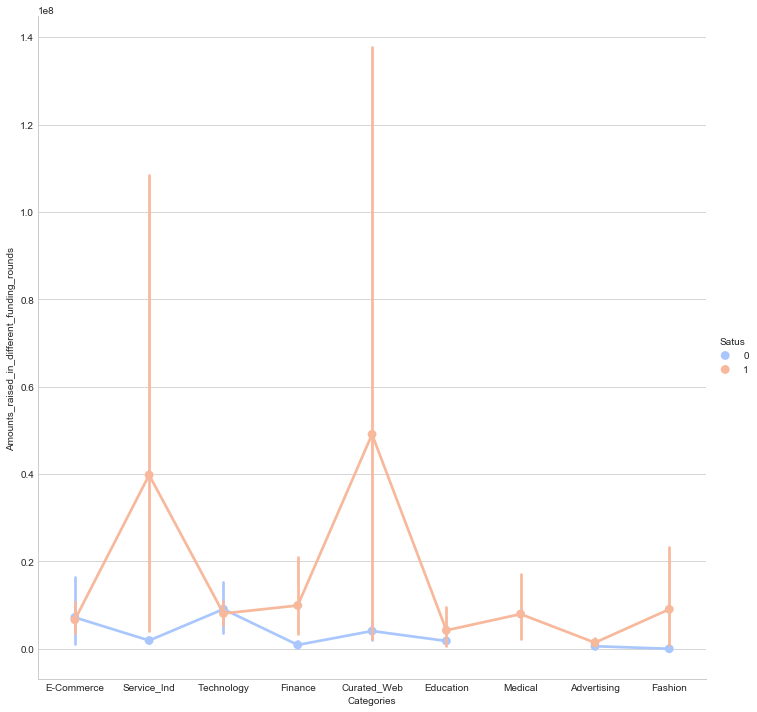

In [10]:
# Factorplot for years married with Had Affair hue
sns.factorplot('Categories','Amounts_raised_in_different_funding_rounds' ,hue='Satus',data=df3, palette='coolwarm', size = 10)

Looks like probability of having an affair increases with the number of years married. Let's check the number of children.

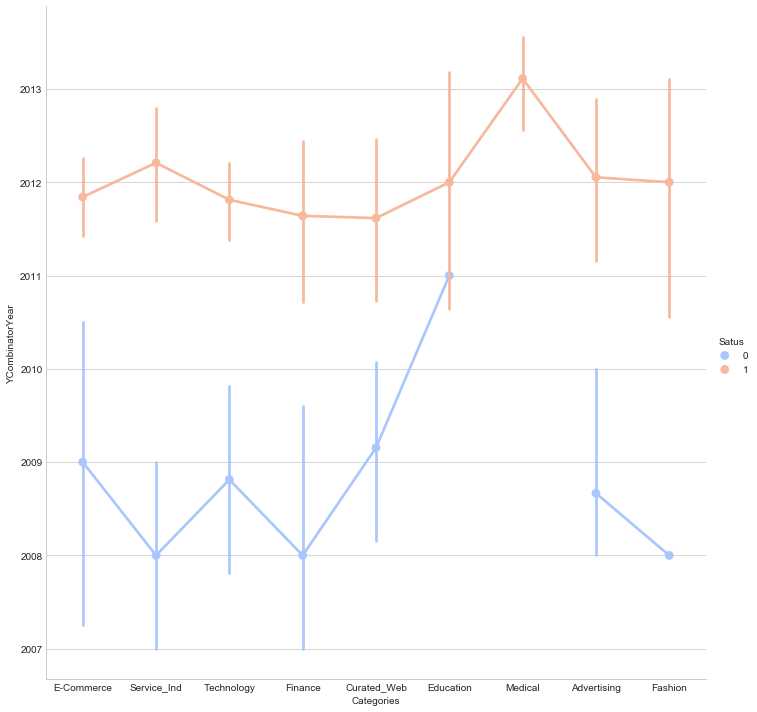

In [11]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('Categories','YCombinatorYear' ,hue='Satus',data=df3, palette='coolwarm', size = 10)

Pretty strong evidence suggesting that less children results in a lower probability of an affair. Finally let's check the education level.

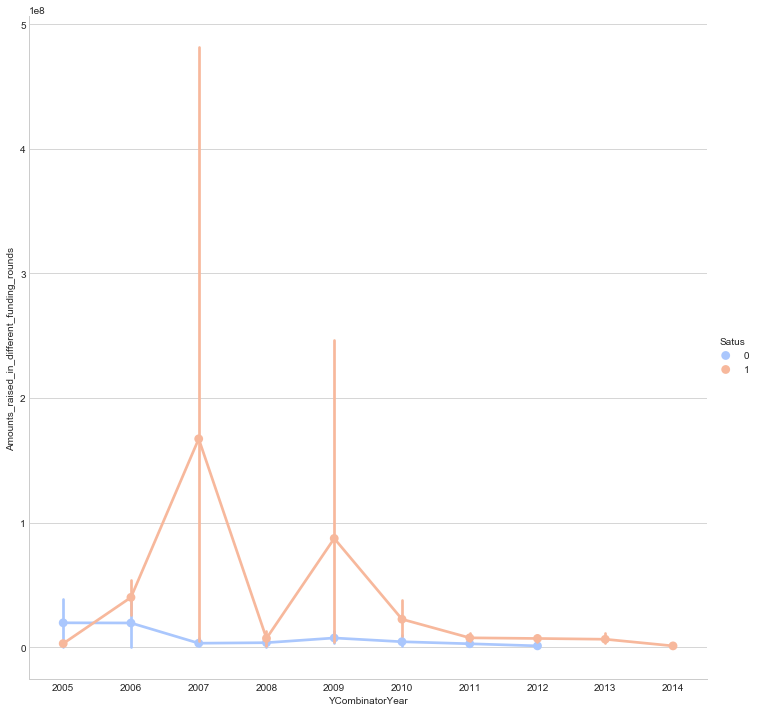

In [12]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('YCombinatorYear','Amounts_raised_in_different_funding_rounds' ,hue='Satus',data=df3, palette='coolwarm', size = 10)

In [13]:
# Create new DataFrames for the Categorical Variables
cat_dummies = pd.get_dummies(df['Categories'])
#hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
cat_dummies.head()

,Advertising,Curated_Web,E-Commerce,Education,Fashion,Finance,Medical,Service_Ind,Technology
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0


In [14]:
# Create column names for the new DataFrames
cat_dummies.columns = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7', 'cat8', 'cat9']
#hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

Now we will create the X and Y data sets for out logistic regression!

In [15]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df3.drop(['Categories','Satus'],axis=1)
X

,Amounts_raised_in_different_funding_rounds,YCombinatorYear
0,1200000,2011
1,3000000,2013
2,7300000,2012
3,2000000,2010
4,1714000,2010
6,2400000,2013
7,3800000,2012
8,1300000,2010
9,740000,2010
10,535000,2013


In [16]:
# Concat the dummy DataFrames Together
dummies = pd.concat([cat_dummies],axis=1)


Now we will concatenate all the DataFrames together.

In [17]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,Amounts_raised_in_different_funding_rounds,YCombinatorYear,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1200000.0,2011.0,0,0,1,0,0,0,0,0,0
1,3000000.0,2013.0,0,0,1,0,0,0,0,0,0
2,7300000.0,2012.0,0,0,0,0,0,0,0,1,0
3,2000000.0,2010.0,0,0,0,0,0,0,0,0,1
4,1714000.0,2010.0,0,0,0,0,0,1,0,0,0


Now let's go ahead and set up the Y.

In [18]:
# Set Y as Target class, Had Affair
Y = df3.Satus

# Preview
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: Satus, dtype: int64

Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid [multicollinearity](http://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity). Multicollinearity occurs due to the [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_(statistics)) we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [19]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('cat1',axis=1)

# Drop affairs column so Y target makes sense
#X = X.drop('affairs',axis=1)
X.dropna(inplace=True)
# PReview
X

,Amounts_raised_in_different_funding_rounds,YCombinatorYear,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1200000.0,2011.0,0,1,0,0,0,0,0,0
1,3000000.0,2013.0,0,1,0,0,0,0,0,0
2,7300000.0,2012.0,0,0,0,0,0,0,1,0
3,2000000.0,2010.0,0,0,0,0,0,0,0,1
4,1714000.0,2010.0,0,0,0,0,1,0,0,0
6,2400000.0,2013.0,0,0,0,0,0,0,1,0
7,3800000.0,2012.0,0,0,0,0,0,0,1,0
8,1300000.0,2010.0,1,0,0,0,0,0,0,0
9,740000.0,2010.0,1,0,0,0,0,0,0,0
10,535000.0,2013.0,0,0,0,0,1,0,0,0


In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called [ravel](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html). Let's use it!

In [20]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

### Part 7: Logistic Regression with SciKit Learn

Awesome! Now let's go ahead and run the logistic regression. This is a very similar process to the Linear Regression from the previous lecture. We'll create the model, the fit the data into the model, and check our accuracy score. Then we'll split the data into testing and training sets and see if our results improve.

Let's start by initiating the model!

In [21]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.8298611111111112

Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the [null error rate](http://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

In [22]:
# Check percentage of women that had affairs
Y.mean()

0.8298611111111112

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [23]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [24]:
coeff_df

,0,1
0,Amounts_raised_in_different_funding_rounds,[1.4486768814871781e-08]
1,YCombinatorYear,[0.000698456549442976]
2,cat2,[-1.0619781124846985e-09]
3,cat3,[5.284279607097095e-08]
4,cat4,[2.5131710518995354e-08]
5,cat5,[1.7974970179708605e-08]
6,cat6,[3.7935318949134885e-08]
7,cat7,[4.6918700208256776e-08]
8,cat8,[4.791208090515408e-08]
9,cat9,[7.63905031874078e-08]


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair. 

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student).

In [25]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.8611111111111112
